In [1]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
print(x, x.unsqueeze(-1))
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(xx)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416]) tensor([[-3.1416],
        [-3.1384],
        [-3.1353],
        ...,
        [ 3.1353],
        [ 3.1384],
        [ 3.1416]])
tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])
99 472.364013671875
199 315.39959716796875
299 211.58897399902344
399 142.9313201904297
499 97.5224609375
599 67.48917388916016
699 47.62507629394531
799 34.48668670654297
899 25.796640396118164
999 20.04869842529297
1099 16.246814727783203
1199 13.732007026672363
1299 12.068506240844727
1399 10.968092918395996
1499 10.240156173706055
1599 9.758606910705566
1699 9.440034866333008
1799 9.229288101196289
1899 9.089860916137695
1999 8.997613906860352
Result: y = 0.0014501914847642183 + 0.8437507748603821 x + -0.0002501821145415306 x^2 + -0.091482

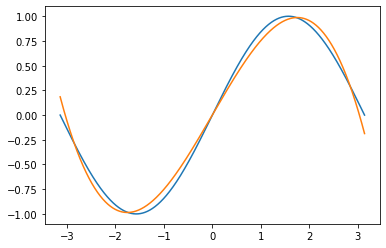

In [4]:
import matplotlib.pyplot as plt
plt.plot(x.cpu().numpy(), y.cpu().numpy())
plt.plot(x.cpu().numpy(), (linear_layer.bias.item() + linear_layer.weight[:, 0].item()*x+linear_layer.weight[:, 1].item()*x**2+linear_layer.weight[:, 2].item()*x**3).cpu().numpy())
plt.show()